<a href="https://colab.research.google.com/github/AnwarMirza/SEP740-Deep-Learning-McMaster-Summer2023/blob/main/07convNetTutorialPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameter Tuning

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_images.shape[1:]

(28, 28, 1)

In [ ]:
# model = tf.keras.models.Sequential([
#  tf.keras.layers.BatchNormalization(input_shape=train_images.shape[1:]),
#  tf.keras.layers.Conv2D(10, 4, padding='same', activation='relu'),
# #  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
# #  tf.keras.layers.Dropout(0.25),

#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(100),
#   tf.keras.layers.Activation('relu'),
#   # tf.keras.layers.Dropout(0.5),
#   tf.keras.layers.Dense(10),
#   tf.keras.layers.Activation('softmax'),
# ])

In [ ]:
model = tf.keras.models.Sequential()

model.add(layers.BatchNormalization(input_shape=train_images.shape[1:]))
model.add(layers.Conv2D(10, 4, activation='relu'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_13 (Bat  (None, 28, 28, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 25, 25, 10)        170       
                                                                 
Total params: 174
Trainable params: 172
Non-trainable params: 2
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_13 (Bat  (None, 28, 28, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 25, 25, 10)        170       
                                                                 
 flatten_13 (Flatten)        (None, 6250)              0         
                                                                 
 dense_25 (Dense)            (None, 100)               625100    
                                                                 
 dense_26 (Dense)            (None, 10)                1010      
                                                                 
Total params: 626,284
Trainable params: 626,282
Non-trainable params: 2
_______________________________________________

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001), #optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(train_images, train_labels, validation_data=(test_images,test_labels),
                    batch_size=50, epochs=15)

Epoch 1/15
1200/1200 [==============================] - 38s 30ms/step - loss: 0.1666 - acc: 0.9497 - val_loss: 0.0550 - val_acc: 0.9823
Epoch 2/15
1200/1200 [==============================] - 37s 30ms/step - loss: 0.0516 - acc: 0.9845 - val_loss: 0.0550 - val_acc: 0.9813
Epoch 3/15
1200/1200 [==============================] - 40s 33ms/step - loss: 0.0301 - acc: 0.9911 - val_loss: 0.0561 - val_acc: 0.9844
Epoch 4/15
1200/1200 [==============================] - 38s 32ms/step - loss: 0.0195 - acc: 0.9940 - val_loss: 0.0550 - val_acc: 0.9854
Epoch 5/15
1200/1200 [==============================] - 37s 31ms/step - loss: 0.0117 - acc: 0.9967 - val_loss: 0.0642 - val_acc: 0.9858
Epoch 6/15
1200/1200 [==============================] - 38s 32ms/step - loss: 0.0084 - acc: 0.9977 - val_loss: 0.0716 - val_acc: 0.9848
Epoch 7/15
1200/1200 [==============================] - 39s 33ms/step - loss: 0.0056 - acc: 0.9984 - val_loss: 0.0803 - val_acc: 0.9866
Epoch 8/15
1200/1200 [==========================

In [ ]:
def plot_accuracy(history, miny=None):
  acc = history.history['acc']
  test_acc = history.history['val_acc']
  epochs = range(len(acc))
  plt.plot(epochs, acc)
  plt.plot(epochs, test_acc)
  if miny:
    plt.ylim(miny, 1.0)
  plt.title('accuracy')
  plt.grid()
  plt.figure()

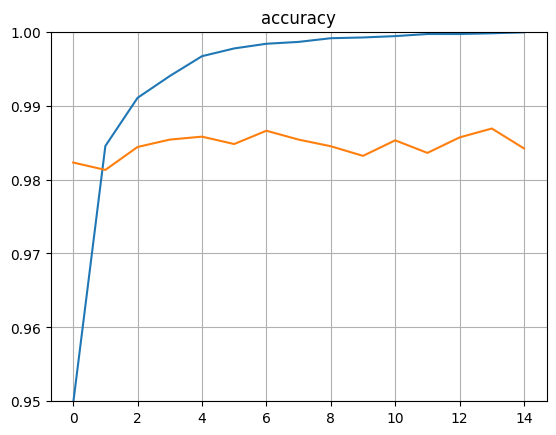

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_accuracy(history, miny=0.95)

#  Model 2 - Adding a Dropout Layer

In [ ]:
model2 = tf.keras.models.Sequential()

model2.add(layers.BatchNormalization(input_shape=train_images.shape[1:]))
model2.add(layers.Conv2D(10, 4, activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dropout(rate=0.5))
model2.add(layers.Dense(100, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_14 (Bat  (None, 28, 28, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 25, 25, 10)        170       
                                                                 
 flatten_14 (Flatten)        (None, 6250)              0         
                                                                 
 dropout_5 (Dropout)         (None, 6250)              0         
                                                                 
 dense_27 (Dense)            (None, 100)               625100    
                                                                 
 dense_28 (Dense)            (None, 10)                1010      
                                                     

In [ ]:
model2.compile(optimizer=RMSprop(lr=0.001), #optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history2 = model2.fit(train_images, train_labels, validation_data=(test_images,test_labels),
                    batch_size=50, epochs=15)

Epoch 1/15
1200/1200 [==============================] - 49s 40ms/step - loss: 0.1970 - acc: 0.9385 - val_loss: 0.0748 - val_acc: 0.9756
Epoch 2/15
1200/1200 [==============================] - 45s 38ms/step - loss: 0.0859 - acc: 0.9742 - val_loss: 0.0519 - val_acc: 0.9835
Epoch 3/15
1200/1200 [==============================] - 43s 36ms/step - loss: 0.0692 - acc: 0.9793 - val_loss: 0.0520 - val_acc: 0.9839
Epoch 4/15
1200/1200 [==============================] - 44s 37ms/step - loss: 0.0608 - acc: 0.9820 - val_loss: 0.0436 - val_acc: 0.9859
Epoch 5/15
1200/1200 [==============================] - 42s 35ms/step - loss: 0.0550 - acc: 0.9842 - val_loss: 0.0451 - val_acc: 0.9859
Epoch 6/15
1200/1200 [==============================] - 42s 35ms/step - loss: 0.0533 - acc: 0.9839 - val_loss: 0.0453 - val_acc: 0.9864
Epoch 7/15
1200/1200 [==============================] - 43s 36ms/step - loss: 0.0509 - acc: 0.9848 - val_loss: 0.0408 - val_acc: 0.9880
Epoch 8/15
1200/1200 [==========================

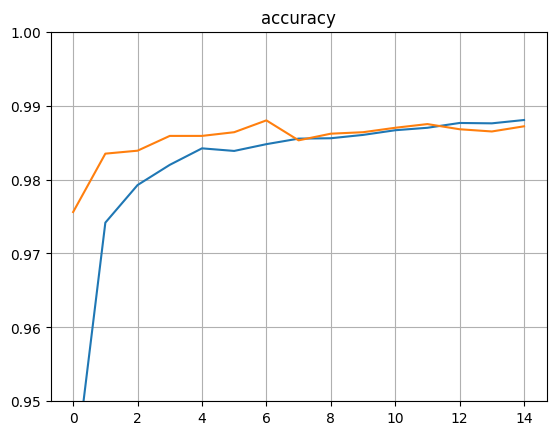

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_accuracy(history2, miny=0.95)

# Model 3 - Increasing the Number of Neurons in the Dense Layer

In [ ]:
model3 = tf.keras.models.Sequential()

model3.add(layers.BatchNormalization(input_shape=train_images.shape[1:]))
model3.add(layers.Conv2D(10, 4, activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dropout(rate=0.5))
model3.add(layers.Dense(200, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_15 (Bat  (None, 28, 28, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 25, 25, 10)        170       
                                                                 
 flatten_15 (Flatten)        (None, 6250)              0         
                                                                 
 dropout_6 (Dropout)         (None, 6250)              0         
                                                                 
 dense_29 (Dense)            (None, 200)               1250200   
                                                                 
 dense_30 (Dense)            (None, 10)                2010      
                                                     

In [ ]:
model3.compile(optimizer=RMSprop(lr=0.001), #optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history3 = model3.fit(train_images, train_labels, validation_data=(test_images,test_labels),
                    batch_size=50, epochs=15)

Epoch 1/15
1200/1200 [==============================] - 55s 45ms/step - loss: 0.1910 - acc: 0.9416 - val_loss: 0.0648 - val_acc: 0.9791
Epoch 2/15
1200/1200 [==============================] - 55s 46ms/step - loss: 0.0797 - acc: 0.9752 - val_loss: 0.0624 - val_acc: 0.9793
Epoch 3/15
1200/1200 [==============================] - 56s 47ms/step - loss: 0.0617 - acc: 0.9816 - val_loss: 0.0496 - val_acc: 0.9848
Epoch 4/15
1200/1200 [==============================] - 57s 47ms/step - loss: 0.0569 - acc: 0.9833 - val_loss: 0.0429 - val_acc: 0.9867
Epoch 5/15
1200/1200 [==============================] - 55s 46ms/step - loss: 0.0527 - acc: 0.9847 - val_loss: 0.0532 - val_acc: 0.9849
Epoch 6/15
1200/1200 [==============================] - 55s 46ms/step - loss: 0.0490 - acc: 0.9858 - val_loss: 0.0518 - val_acc: 0.9851
Epoch 7/15
1200/1200 [==============================] - 56s 46ms/step - loss: 0.0454 - acc: 0.9869 - val_loss: 0.0389 - val_acc: 0.9882
Epoch 8/15
1200/1200 [==========================

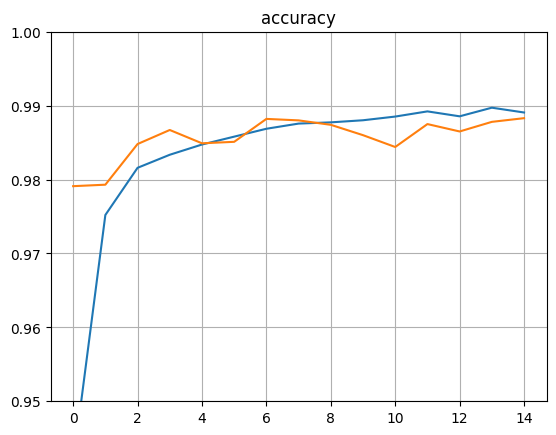

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_accuracy(history3, miny=0.95)

# Model 4 - Decreasing the Number of Neurons in the Dense Layer

In [ ]:
model4 = tf.keras.models.Sequential()

model4.add(layers.BatchNormalization(input_shape=train_images.shape[1:]))
model4.add(layers.Conv2D(10, 4, activation='relu'))
model4.add(layers.Flatten())
model4.add(layers.Dropout(rate=0.5))
model4.add(layers.Dense(50, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))

model4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_16 (Bat  (None, 28, 28, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 25, 25, 10)        170       
                                                                 
 flatten_16 (Flatten)        (None, 6250)              0         
                                                                 
 dropout_7 (Dropout)         (None, 6250)              0         
                                                                 
 dense_31 (Dense)            (None, 50)                312550    
                                                                 
 dense_32 (Dense)            (None, 10)                510       
                                                     

In [ ]:
model4.compile(optimizer=RMSprop(lr=0.001), #optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history4 = model4.fit(train_images, train_labels, validation_data=(test_images,test_labels),
                    batch_size=50, epochs=15)

Epoch 1/15
1200/1200 [==============================] - 41s 33ms/step - loss: 0.2251 - acc: 0.9305 - val_loss: 0.0828 - val_acc: 0.9742
Epoch 2/15
1200/1200 [==============================] - 39s 33ms/step - loss: 0.0984 - acc: 0.9703 - val_loss: 0.0609 - val_acc: 0.9789
Epoch 3/15
1200/1200 [==============================] - 39s 32ms/step - loss: 0.0777 - acc: 0.9760 - val_loss: 0.0548 - val_acc: 0.9830
Epoch 4/15
1200/1200 [==============================] - 38s 32ms/step - loss: 0.0672 - acc: 0.9795 - val_loss: 0.0486 - val_acc: 0.9844
Epoch 5/15
1200/1200 [==============================] - 39s 33ms/step - loss: 0.0620 - acc: 0.9811 - val_loss: 0.0458 - val_acc: 0.9855
Epoch 6/15
1200/1200 [==============================] - 37s 31ms/step - loss: 0.0568 - acc: 0.9832 - val_loss: 0.0536 - val_acc: 0.9829
Epoch 7/15
1200/1200 [==============================] - 37s 31ms/step - loss: 0.0563 - acc: 0.9833 - val_loss: 0.0510 - val_acc: 0.9844
Epoch 8/15
1200/1200 [==========================

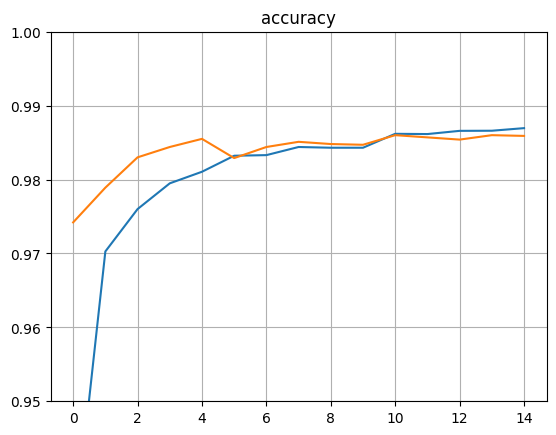

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_accuracy(history4, miny=0.95)

# Model 5 - Adding More Convolution Layers With Pooling

In [ ]:
model5 = tf.keras.models.Sequential()

model5.add(layers.BatchNormalization(input_shape=train_images.shape[1:]))
model5.add(layers.Conv2D(10, 4, activation='relu'))
model5.add(layers.MaxPooling2D(2))
model5.add(layers.Conv2D(20, 4, activation='relu'))
model5.add(layers.Flatten())
model5.add(layers.Dropout(rate=0.5))
model5.add(layers.Dense(100, activation='relu'))
model5.add(layers.Dense(10, activation='softmax'))

model5.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_17 (Bat  (None, 28, 28, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 25, 25, 10)        170       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 9, 9, 20)          3220      
                                                                 
 flatten_17 (Flatten)        (None, 1620)              0         
                                                                 
 dropout_8 (Dropout)         (None, 1620)            

In [ ]:
model5.compile(optimizer=RMSprop(lr=0.001), #optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history5 = model5.fit(train_images, train_labels, validation_data=(test_images,test_labels),
                    batch_size=50, epochs=15)

Epoch 1/15
1200/1200 [==============================] - 43s 35ms/step - loss: 0.1622 - acc: 0.9502 - val_loss: 0.0438 - val_acc: 0.9863
Epoch 2/15
1200/1200 [==============================] - 42s 35ms/step - loss: 0.0697 - acc: 0.9784 - val_loss: 0.0348 - val_acc: 0.9889
Epoch 3/15
1200/1200 [==============================] - 43s 35ms/step - loss: 0.0560 - acc: 0.9831 - val_loss: 0.0381 - val_acc: 0.9870
Epoch 4/15
1200/1200 [==============================] - 44s 37ms/step - loss: 0.0500 - acc: 0.9847 - val_loss: 0.0317 - val_acc: 0.9906
Epoch 5/15
1200/1200 [==============================] - 43s 36ms/step - loss: 0.0450 - acc: 0.9863 - val_loss: 0.0290 - val_acc: 0.9904
Epoch 6/15
1200/1200 [==============================] - 43s 36ms/step - loss: 0.0411 - acc: 0.9873 - val_loss: 0.0309 - val_acc: 0.9899
Epoch 7/15
1200/1200 [==============================] - 43s 36ms/step - loss: 0.0391 - acc: 0.9887 - val_loss: 0.0303 - val_acc: 0.9897
Epoch 8/15
1200/1200 [==========================

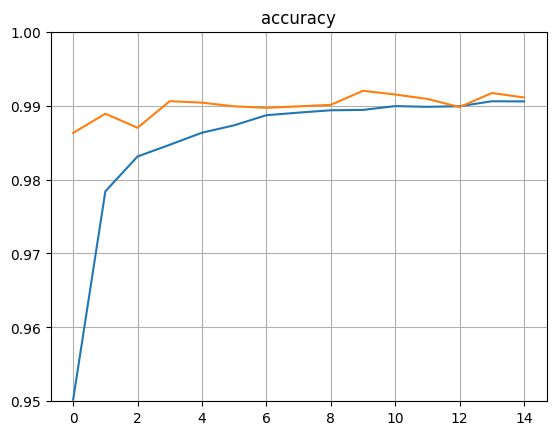

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_accuracy(history5, miny=0.95)

# Almost 100% Accuracy

In [ ]:
model6 = tf.keras.models.Sequential()

model6.add(layers.BatchNormalization(input_shape=train_images.shape[1:]))
model6.add(layers.Conv2D(16, 4, activation='relu'))
model6.add(layers.MaxPooling2D(2))
model6.add(layers.Conv2D(32, 4, activation='relu'))
model6.add(layers.MaxPooling2D(2))
model6.add(layers.Flatten())
model6.add(layers.Dropout(rate=0.4))
model6.add(layers.Dense(100, activation='relu'))
model6.add(layers.Dense(10, activation='softmax'))

model6.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_18 (Bat  (None, 28, 28, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 25, 25, 16)        272       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 9, 9, 32)          8224      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                     

In [ ]:
model6.compile(optimizer=RMSprop(lr=0.001), #optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history6 = model6.fit(train_images, train_labels, validation_data=(test_images,test_labels),
                    batch_size=50, epochs=15)

Epoch 1/15
1200/1200 [==============================] - 49s 40ms/step - loss: 0.2068 - acc: 0.9353 - val_loss: 0.0626 - val_acc: 0.9803
Epoch 2/15
1200/1200 [==============================] - 47s 39ms/step - loss: 0.0837 - acc: 0.9734 - val_loss: 0.0406 - val_acc: 0.9873
Epoch 3/15
1200/1200 [==============================] - 47s 39ms/step - loss: 0.0648 - acc: 0.9801 - val_loss: 0.0348 - val_acc: 0.9894
Epoch 4/15
1200/1200 [==============================] - 45s 38ms/step - loss: 0.0581 - acc: 0.9826 - val_loss: 0.0373 - val_acc: 0.9884
Epoch 5/15
1200/1200 [==============================] - 46s 38ms/step - loss: 0.0506 - acc: 0.9843 - val_loss: 0.0276 - val_acc: 0.9919
Epoch 6/15
1200/1200 [==============================] - 46s 39ms/step - loss: 0.0468 - acc: 0.9852 - val_loss: 0.0260 - val_acc: 0.9912
Epoch 7/15
1200/1200 [==============================] - 46s 38ms/step - loss: 0.0428 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.9917
Epoch 8/15
1200/1200 [==========================

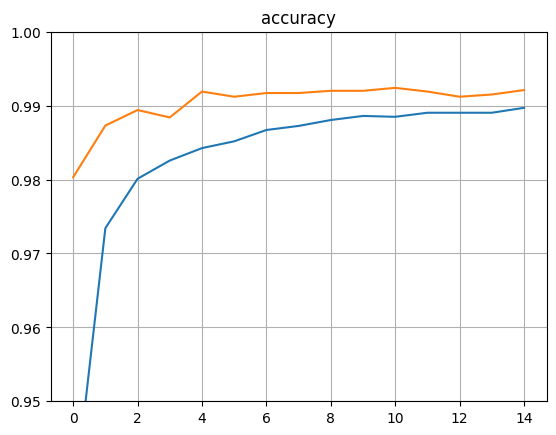

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_accuracy(history6, miny=0.95)